<a href="https://colab.research.google.com/github/BrunoBVR/DL-with-python/blob/main/5p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training a convnet from scratch on a small dataset

Classifying Dogs vs. Cats images.

---

## Downloading the data

This dataset contains 25,000 images of dogs and cats (12,500 from each class) and is 543 MB (compressed). It can be found on Kaggle, [here](https://www.kaggle.com/c/dogs-vs-cats/data).



In [1]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Changing to project folder for download

root_path = '/content/drive/MyDrive/DL-With-Python/Chapter5'  #change dir to your project folder


In [3]:
# # Upload kaggle.json
# from google.colab import files
# files.upload()  #this will prompt you to upload the kaggle.json

In [4]:
# !pip install -q kaggle
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !ls ~/.kaggle
# !chmod 600 /root/.kaggle/kaggle.json  # set permission

In [5]:
import os, shutil

In [6]:
# !kaggle competitions download -c dogs-vs-cats -p /content/drive/MyDrive/DL-With-Python/Chapter5

In [7]:
# # Unzip
# os.chdir('/content/drive/MyDrive/DL-With-Python/Chapter5')  #change dir
# !unzip -q /content/drive/MyDrive/DL-With-Python/Chapter5/train.zip -d train/

In [8]:
# !unzip -q /content/drive/MyDrive/DL-With-Python/Chapter5/test1.zip -d test/

Checking how many training images:

In [9]:
print('Images on train set: ', len(os.listdir('/content/drive/MyDrive/DL-With-Python/Chapter5/train/train')))

Images on train set:  25000


## Copying images to training, validation and test directories

> After downloading and uncompressing it, you’ll create a new
dataset containing three subsets: a training set with 1,000 samples of each class, a vali-
dation set with 500 samples of each class, and a test set with 500 samples of each class.

In [10]:
original_dataset_dir = '/content/drive/MyDrive/DL-With-Python/Chapter5/train/train'

# This is where we'll store the smaller dataset
base_dir = '/content/drive/MyDrive/DL-With-Python/Chapter5/cats_and_dogs_small'

if not os.path.exists(base_dir):
  os.mkdir(base_dir)

# Directories for training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
  os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
  os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
  os.mkdir(test_dir)

# Directory with training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
  os.mkdir(train_cats_dir)
# Directory with training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
  os.mkdir(train_dogs_dir)

# Directory with validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
  os.mkdir(validation_cats_dir)
# Directory with validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
  os.mkdir(validation_dogs_dir)

# Directory with test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
  os.mkdir(test_cats_dir)
# Directory with test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
  os.mkdir(test_dogs_dir)

# # Copying first 1000 cat images to train_cats_dir
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(train_cats_dir, fname)
#   shutil.copyfile(src, dst)

# # Next 500 images to validation
# fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(validation_cats_dir, fname)
#   shutil.copyfile(src, dst)

# # Next 500 images to test
# fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(test_cats_dir, fname)
#   shutil.copyfile(src, dst)

# # Copying first 1000 dog images to train_dogs_dir
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(train_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# # Next 500 images to validation
# fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(validation_dogs_dir, fname)
#   shutil.copyfile(src, dst)

# # Next 500 images to test
# fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
# for fname in fnames:
#   src = os.path.join(original_dataset_dir, fname)
#   dst = os.path.join(test_dogs_dir, fname)
#   shutil.copyfile(src, dst)

Sanity check for files in our splits:

In [11]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

print('total training dog images:', len(os.listdir(train_dogs_dir)))

print('total validation cat images:', len(os.listdir(validation_cats_dir)))

print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

print('total test cat images:', len(os.listdir(test_cats_dir)))

print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


## Building the network

In [12]:
from tensorflow.keras import layers, models

In [13]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape = (150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

## Compiling the model

In [15]:
from tensorflow.keras import optimizers

In [16]:
model.compile(loss= 'binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

## Data preprocessing

In [18]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [19]:
# Rescaling
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir, # Target dir
    target_size = (150, 150), # Resizes all images to 150x150
    batch_size = 20,
    class_mode = 'binary' # Because we are using binary_crossentropy
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir, # Target dir
    target_size = (150, 150), # Resizes all images to 150x150
    batch_size = 20,
    class_mode = 'binary' # Because we are using binary_crossentropy
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


## Fitting the model

In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 522s 5s/step - loss: 0.6944 - acc: 0.5185 - val_loss: 0.6837 - val_acc: 0.5010
Epoch 2/30
100/100 [==============================] - 18s 179ms/step - loss: 0.6688 - acc: 0.6040 - val_loss: 0.6602 - val_acc: 0.6110
Epoch 3/30
100/100 [==============================] - 18s 180ms/step - loss: 0.6267 - acc: 0.6545 - val_loss: 0.6709 - val_acc: 0.5850
Epoch 4/30
100/100 [==============================] - 18s 178ms/step - loss: 0.5791 - acc: 0.6980 - val_loss: 0.6122 - val_acc: 0.6610
Epoch 5/30
100/100 [==============================] - 18s 180ms/step - loss: 0.5412 - acc: 0.7175 - val_loss: 0.6256 - val_acc: 0.6560
Epoch 6/30
100/100 [==============================] - 18s 178ms/step - loss: 0.5105 - acc: 0.7485 - val_loss: 0.5723 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 18s 179ms/step - loss: 0.4696 - acc: 0.7740 - val_loss: 0.6232 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 18s

In [21]:
model.save('/content/drive/MyDrive/DL-With-Python/Chapter5/cats_and_dogs_small_1.h5')

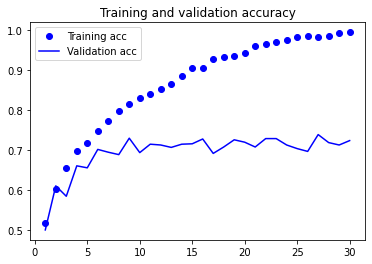

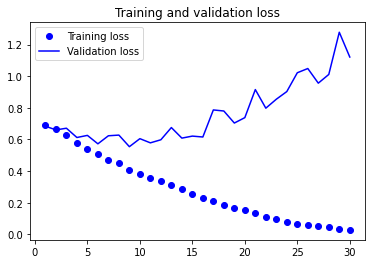

In [22]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Using data augmentation

> Data augmentation takes the approach of generating more training data
from existing training samples, by *augmenting* the samples via a number of random transformations that yield believable-looking images. The goal is that at training time, your model will never see the exact same picture twice. This helps expose the model to more aspects of the data and generalize better.

## Setting up a data augmentation configuration via **ImageDataGenerator**

In [23]:
datagen = ImageDataGenerator(
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

### Looking at augmented image

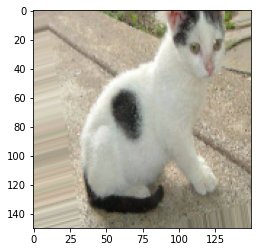

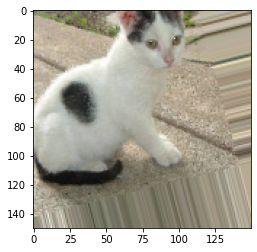

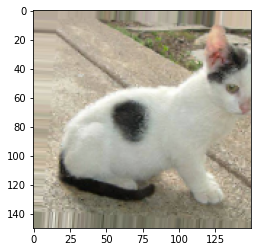

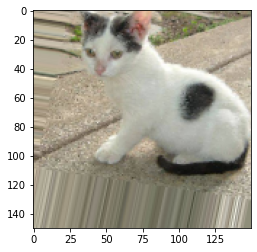

In [24]:
from keras.preprocessing import image

fnames = [os.path.join(train_cats_dir, fname) for
          fname in os.listdir(train_cats_dir)]

# Choosing image to augment
img_path = fnames[3]

# Reading and resizing
img = image.load_img(img_path, target_size=(150, 150))

# Converts it to a Numpy array with shape (150, 150, 3)
x = image.img_to_array(img)

# Reshaping to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# Generating batches of randomly transformed images
# Loops indefinitely, so needs to break at some point!
i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if i % 4 == 0:
    break

plt.show()

> If you train a new network using this data-augmentation configuration, the network will never see the same input twice. But the inputs it sees are still heavily intercorrelated, because they come from a small number of original images—you can’t produce new information, you can only remix existing information. As such, this may not be enough to completely get rid of overfitting. To further fight overfitting, you’ll also add a Dropout layer to your model, right before the densely connected classifier.

## defining new *convnet* including **dropout**

In [26]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',
          input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=1e-4),
              metrics=['acc'])

Training the new network:

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

# Validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,  # Target dir
    target_size = (150, 150),   # Resizes all images to 150x150
    batch_size = 32,
    class_mode = 'binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,  # Target dir
    target_size = (150, 150),   # Resizes all images to 150x150
    batch_size = 32,
    class_mode = 'binary'
)

history = model.fit(
    train_generator,
    steps_per_epoch = 2000//32,
    epochs = 100,
    validation_data = validation_generator,
    validation_steps = 1000//32
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
62/62 [==============================] - 28s 454ms/step - loss: 0.6880 - acc: 0.5325 - val_loss: 0.6754 - val_acc: 0.5927
Epoch 2/100
62/62 [==============================] - 28s 451ms/step - loss: 0.6829 - acc: 0.5452 - val_loss: 0.6624 - val_acc: 0.6008
Epoch 3/100
62/62 [==============================] - 28s 451ms/step - loss: 0.6738 - acc: 0.5757 - val_loss: 0.6536 - val_acc: 0.6109
Epoch 4/100
62/62 [==============================] - 28s 451ms/step - loss: 0.6665 - acc: 0.5783 - val_loss: 0.6381 - val_acc: 0.6240
Epoch 5/100
62/62 [==============================] - 28s 455ms/step - loss: 0.6513 - acc: 0.6001 - val_loss: 0.7474 - val_acc: 0.5333
Epoch 6/100
62/62 [==============================] - 28s 452ms/step - loss: 0.6487 - acc: 0.6133 - val_loss: 0.6247 - val_acc: 0.6411
Epoch 7/100
62/62 [==============================] - 28s 449ms/step - loss: 0.6357 - acc: 0.6296 - val_loss: 0.6

In [29]:
model.save('/content/drive/MyDrive/DL-With-Python/Chapter5/cats_and_dogs_small_2.h5')

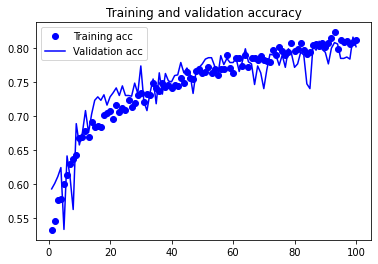

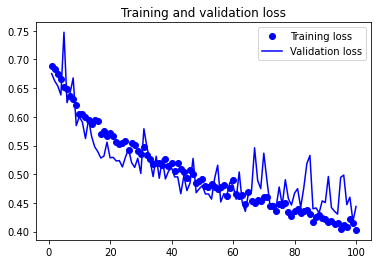

In [30]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()